# 🏢 OFFICE CATEGORY PREDICTION - BASELINE TEMPLATE

This notebook provides a simple baseline for the Office Classification challenge.

**Your task:** Improve upon this baseline by trying different approaches!

## 💡 Hints on What to Try

1. **Feature Engineering** - Create interactions, polynomials, ratios
2. **Different Models** - Random Forest, XGBoost, Neural Networks
3. **Hyperparameter Tuning** - Optimize model parameters
4. **Ensemble Methods** - Combine multiple models
5. **Handle Missing Values Better** - Try different imputation strategies
6. **Encode Categoricals Differently** - One-hot encoding, target encoding


**Good luck!** 🚀

In [2]:
# ============================================================================
# STEP 1: IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploads = files.upload()
list(uploads.keys())

Saving office_test.csv to office_test.csv
Saving office_train.csv to office_train.csv


['office_test.csv', 'office_train.csv']

Dataset loaded successfully!
Shape: (35000, 79)
Target distribution:
OfficeCategory
0    6675
1    7314
2    6906
3    7013
4    7092
Name: count, dtype: int64
BuildingClass              0
ZoningClassification      99
StreetFrontage          5897
PlotSize                   0
StreetType                 0
                        ... 
MiscellaneousValue         0
MonthListed                0
YearListed                 0
ListingType               23
ListingCondition           0
Length: 79, dtype: int64
BuildingClass            0.00
ZoningClassification     0.28
StreetFrontage          16.85
PlotSize                 0.00
StreetType               0.00
                        ...  
MiscellaneousValue       0.00
MonthListed              0.00
YearListed               0.00
ListingType              0.07
ListingCondition         0.00
Length: 79, dtype: float64
RecreationQuality        35000
MiscellaneousFeature     34955
AlleyAccess              34838
Perimeter                33697
ExteriorFinishT

,count,mean,std,min,25%,50%,75%,max
BuildingClass,35000.0,57.268069,42.533897,20.0,20.000000,50.000000,70.000000,190.0
StreetFrontage,29103.0,68.866294,21.136450,21.0,60.000000,68.000000,78.000000,313.0
PlotSize,35000.0,10113.116137,7777.883667,1300.0,7482.457563,9467.064382,11577.452419,215245.0
BuildingGrade,35000.0,6.081568,1.414518,1.0,5.000000,6.000000,7.000000,10.0
BuildingCondition,35000.0,5.558214,1.115930,1.0,5.000000,5.000000,6.000000,9.0
ConstructionYear,35000.0,1971.338257,30.348055,1872.0,1953.000000,1973.000000,2001.000000,2010.0
RenovationYear,35000.0,1984.389257,20.882223,1950.0,1965.000000,1993.000000,2004.000000,2010.0
ExteriorFinishArea,34727.0,101.612318,181.748637,0.0,0.000000,0.000000,162.000000,1600.0
FinishedBasementArea1,34988.0,440.563506,461.814992,0.0,0.000000,363.276423,733.000000,5644.0
FinishedBasementArea2,34992.0,49.296785,169.355395,0.0,0.000000,0.000000,0.000000,1526.0


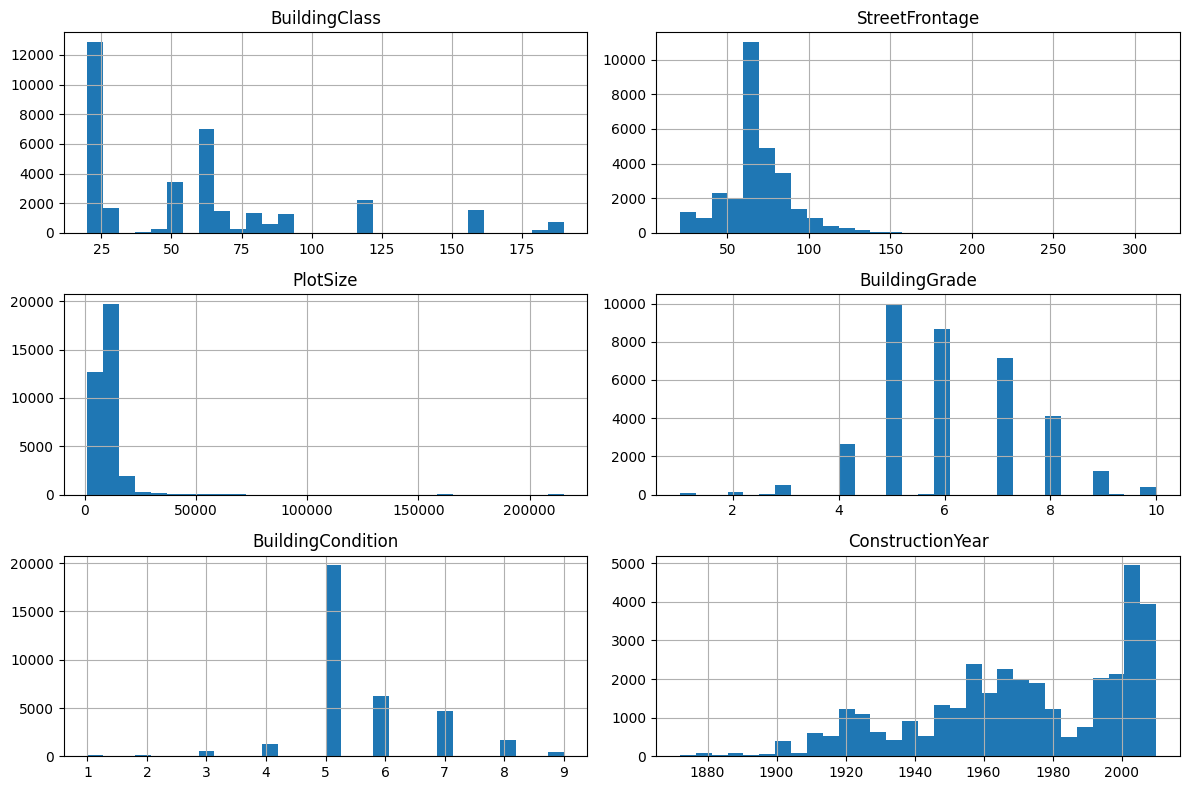

In [4]:
# ============================================================================
# STEP 2: LOAD DATA
# ============================================================================

# Load training data
train = pd.read_csv('office_train.csv')

# Separate features and target
X = train.drop('OfficeCategory', axis=1) #x-axis everything except the label
y = train['OfficeCategory']

print("Dataset loaded successfully!")
print(f"Shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts().sort_index()}")

# TODO: Explore the data here
# - Check for missing values: X.isnull().sum()
miss_count = X.isnull().sum()
print(miss_count)
miss_pct = (X.isnull().mean()*100).round(2)
print(miss_pct)
missing = X.isnull().sum().sort_values(ascending=False).head(10)
print(missing)
# - Look at feature distributions: X.describe()
feature_dis = X.describe().T
display(feature_dis)
# - Visualize relationships: Use matplotlib/seaborn
import matplotlib.pyplot as plt
cols = [c for c in X.select_dtypes('number').columns[:6]]
X[cols].hist(bins=30, figsize=(12,8))
plt.tight_layout(); plt.show()
# - Understand which features matter most

In [11]:
# ============================================================================
# STEP 3: SIMPLE PREPROCESSING
# ============================================================================

def simple_preprocess(X_train, X_test=None, num_strategy="median", cat_strategy="mode", constant_fill_value="Missing", onehot_drop_first=False, clip_outliers=False, iqr_factor=1.5, scale_numeric=False):
    """
    Basic preprocessing: Fill missing values and encode categoricals

    TODO: Improve this function!
    Ideas:
    - Try different imputation strategies (mean, mode, KNN)
    - Create new features (interactions, ratios, polynomials)
    - Try one-hot encoding instead of label encoding
    - Handle outliers
    - Scale/normalize features
    """

    # Make copies so original doesnt get changed
    X_train = X_train.copy()
    if X_test is not None:
        X_test = X_test.copy()

    # Identify feature types
    numeric_features = X_train.select_dtypes(include=[np.number]).columns
    categorical_features = X_train.select_dtypes(include=['object']).columns

    print(f"Numeric features: {len(numeric_features)}")
    print(f"Categorical features: {len(categorical_features)}")

    # Fill missing values - NUMERIC
    for col in numeric_features:
        if num_strategy == "median":
            stat_val = X_train[col].median()
        elif num_strategy == "mean":
            stat_val = X_train[col].mean()
        else:
            raise ValueError("num_Strategy must be median or mean")
        X_train[col] = X_train[col].fillna(stat_val)
        if X_test is not None:
            X_test[col] = X_test[col].fillna(stat_val)


  #handling outliers
    if clip_outliers and numeric_features.size > 0:
      q1 = X_train[numeric_features].quantile(0.25)
      q3 = X_train[numeric_features].quantile(0.75)
      iqr = q3-q1
      lower = q1 - iqr_factor * iqr
      upper = q3 + iqr_factor * iqr

      X_train[numeric_features] = X_train[numeric_features].clip(lower=lower, upper=upper, axis=1)
      if X_test is not None:
        X_test[numeric_features] = X_test[numeric_features].clip(lower=lower, upper=upper, axis=1)

    # Fill missing values - CATEGORICAL
    for col in categorical_features:
        if cat_strategy == "mode":
            mode_series = X_train[col].mode()
            fill_val = mode_series.iloc[0] if len(mode_series) else constant_fill_value
        elif cat_strategy == "constant":
            fill_val = constant_fill_value
        else:
            raise ValueError("cat_strategy must be 'mode' or 'constant'")

        X_train[col] = X_train[col].astype("object").fillna(fill_val)
        if X_test is not None:
            X_test[col] = X_test[col].astype("object").fillna(fill_val)


    # Encode categorical features (one-hot encoding)

    if len(categorical_features) > 0:
        train_cats = pd.get_dummies(
            X_train[categorical_features].astype(str),
            prefix=categorical_features,
            drop_first=onehot_drop_first
        )
        if X_test is not None:
            test_cats = pd.get_dummies(
                X_test[categorical_features].astype(str),
                prefix=categorical_features,
                drop_first=onehot_drop_first
            )
            # Align TEST to TRAIN's one-hot columns; unseen in TRAIN → dropped; missing in TEST → 0
            test_cats = test_cats.reindex(columns=train_cats.columns, fill_value=0)

        # Keep numeric as-is and concat with encoded cats
        X_train_num = X_train[numeric_features]
        X_train = pd.concat([X_train_num, train_cats], axis=1)

        if X_test is not None:
            X_test_num = X_test[numeric_features]
            X_test = pd.concat([X_test_num, test_cats], axis=1)
    else:
        # No categoricals: just keep numeric block
        X_train = X_train[numeric_features]
        if X_test is not None:
            X_test = X_test[numeric_features]


    if scale_numeric and numeric_features.size > 0:
        scaler = StandardScaler()
        X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
        if X_test is not None:
            X_test[numeric_features] = scaler.transform(X_test[numeric_features])

    # Final safety check, fill with 0 if there are still NaN
    X_train = X_train.fillna(0)
    if X_test is not None:
        X_test = X_test.fillna(0)


    if X_test is not None:
        return X_train, X_test
    return X_train

# Apply preprocessing
# Pass both X (training features) and test (test features)
X_processed, X_test_processed_for_split = simple_preprocess(X, test)

print(f"\nAfter preprocessing:")
print(f"Shape: {X_processed.shape}")
print(f"Missing values: {X_processed.isnull().sum().sum()}")

Numeric features: 37
Categorical features: 42

After preprocessing:
Shape: (35000, 288)
Missing values: 0


In [12]:
# ============================================================================
# STEP 4: TRAIN-VALIDATION SPLIT
# ============================================================================

X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTrain set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")


Train set: (28000, 288)
Validation set: (7000, 288)


In [13]:
# ============================================================================
# STEP 5: TRAIN BASELINE MODEL (LOGISTIC REGRESSION)
# ============================================================================

# TODO: Try different models!
# - RandomForestClassifier
# - XGBClassifier
# - GradientBoostingClassifier
# - Neural Networks (MLPClassifier)
# - Ensemble methods (VotingClassifier, StackingClassifier)

print("\n" + "="*70)
print("TRAINING BASELINE MODEL: LOGISTIC REGRESSION")
print("="*70)

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train logistic regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


TRAINING BASELINE MODEL: LOGISTIC REGRESSION


LogisticRegression(max_iter=1000, random_state=42)

In [15]:
# ============================================================================
# STEP 6: EVALUATE MODEL
# ============================================================================

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"\nTrain Accuracy: {train_acc*100:.2f}%")
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Detailed classification report
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# TODO: Add more evaluation metrics
# - Confusion matrix
# - Per-class accuracy
# - Cross-validation scores
# - Feature importance (for tree models)


Train Accuracy: 56.46%
Validation Accuracy: 54.03%

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.46      0.56      0.51      1335
           1       0.39      0.38      0.39      1463
           2       0.39      0.25      0.31      1381
           3       0.55      0.63      0.59      1403
           4       0.84      0.88      0.86      1418

    accuracy                           0.54      7000
   macro avg       0.53      0.54      0.53      7000
weighted avg       0.53      0.54      0.53      7000



In [9]:
# ============================================================================
# STEP 7: MAKE PREDICTIONS ON TEST SET (OPTIONAL)
# ============================================================================

# Upload this file on Kaggle

# Load test data
test = pd.read_csv('office_test.csv')

# Preprocess test data (use same preprocessing as training)
X_test_processed = simple_preprocess(X, test)[1]

# Scale test data
X_test_scaled = scaler.transform(X_test_processed)

# Make predictions
test_predictions = model.predict(X_test_scaled)

# Save predictions
submission = pd.DataFrame({
    'Id': range(len(test_predictions)),
    'OfficeCategory': test_predictions
})
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

Numeric features: 37
Categorical features: 42
Predictions saved to submission.csv


# 🎯 IDEAS TO TRY - IMPROVE YOUR MODEL!

## 1. 🔧 Feature Engineering

Create new features that capture relationships between variables:

```python
# Interaction features (Quality × Size effect)
X['Quality_Size'] = X['BuildingGrade'] * X['OfficeSpace']

# Polynomial features (Non-linear relationships)
X['OfficeSpace_squared'] = X['OfficeSpace'] ** 2
X['BuildingGrade_squared'] = X['BuildingGrade'] ** 2

# Ratio features (Relative measurements)
X['Space_Plot_Ratio'] = X['OfficeSpace'] / (X['PlotSize'] + 1)
X['Restroom_Meeting_Ratio'] = X['Restrooms'] / (X['MeetingRooms'] + 1)

# Aggregated features
X['TotalArea'] = X['OfficeSpace'] + X['BasementArea'] + X['ParkingArea']
```

---

## 2. 🌲 Different Models

Try tree-based models (often better than linear models for this type of data):

```python
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# XGBoost (usually best for tabular data)
model = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)
```

---

## 3. 🎛️ Hyperparameter Tuning

Optimize your model's parameters:

```python
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [5, 10, 20]
}

# Grid search with cross-validation
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")
```

---

## 4. 🤝 Ensemble Methods

Combine multiple models for better predictions:

```python
from sklearn.ensemble import VotingClassifier

# Create individual models
model1 = RandomForestClassifier(n_estimators=200, random_state=42)
model2 = XGBClassifier(n_estimators=200, random_state=42)

# Voting ensemble (combines predictions)
ensemble = VotingClassifier(
    estimators=[('rf', model1), ('xgb', model2)],
    voting='soft',  # Average probabilities
    weights=[1, 1.2]  # Slightly favor XGBoost
)
ensemble.fit(X_train, y_train)
```

---

## 5. 🎯 Feature Selection

Select only the most important features:

```python
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 50 features
selector = SelectKBest(f_classif, k=50)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print(f"Selected features: {list(selected_features)}")
```

---

## 6. 📈 Cross-Validation

Get more reliable performance estimates:

```python
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
)

print(f"CV Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")
```